classifiers - protein, carbs, fats, calories, preptime

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.decomposition import PCA

In [3]:
pd.set_option('display.max_columns', None)

recipe_cooktime = pd.read_csv('./exp/recipe_cooktime.csv')
recipe_ingredient = pd.read_csv('./exp/recipe_ingredient.csv')
recipe_nutrition = pd.read_csv('./exp/recipe_nutrition.csv')
recipe_names = pd.read_csv('./data/recipe.csv')

# Use the recipe id as an index
# recipe_nutrition.set_index("recipe_id", inplace=True)

In [4]:
clustering_dataset = pd.DataFrame(columns = ['recipe_id', 'protein', 'carbo', 'total_fat'], data = recipe_nutrition[['recipe_id', 'protein', 'carbo', 'total_fat']].values)
#clustering_dataset['prep_min'] = recipe_cooktime['prep_min']
clustering_dataset['recipe_id'] = clustering_dataset['recipe_id'].astype(int)
#clustering_dataset['name'] = recipe_names['title']
clustering_dataset.set_index("recipe_id", inplace=True)
clustering_dataset

,protein,carbo,total_fat
recipe_id,,,
214,5.47,41.29,11.53
215,5.70,23.75,1.08
216,4.90,26.88,1.10
217,1.77,18.17,0.21
218,1.38,36.63,5.47
...,...,...,...
1410,6.50,28.81,45.24
1411,3.24,38.67,35.89
1426,6.29,29.24,6.50


In [5]:
sse = []

for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    labels = clf.fit_predict(clustering_dataset)
    sse.append(clf.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(1, 11), sse)
# plt.xticks(range(1, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

[0 1 2 3]


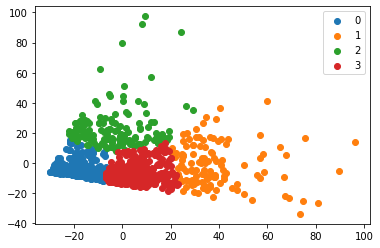

In [6]:
df = PCA(2).fit_transform(clustering_dataset)
k_means = KMeans(n_clusters=kl.elbow)
label = k_means.fit_predict(df)

#Getting unique labels
 
u_labels = np.unique(label)
print(u_labels)
 
#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [16]:
recipe_names.iloc[877]['title']

'Curried Chicken Livers Topped Spud'

In [22]:
import random

recommended_recipes = []
recommended_recipes_indices = []

while len(recommended_recipes) < kl.elbow:
    index = random.choice(range(1, len(clustering_dataset)))
    if len(recommended_recipes) == label[index]:
        recommended_recipes.append(recipe_names.iloc[index]['title'])
        recommended_recipes_indices.append(index)

print(recommended_recipes)
print(recommended_recipes_indices)

['-Dry Roasted Sunflower Seeds-', 'Apple Stuffed Squash', 'Fish and Tomato Zucchini Saffron Coulis', 'Apple Brown Rice Stuffing']
[599, 352, 827, 246]


In [31]:
choices = open("./choices/choices.txt", 'a')

# PUT YOUR CHOICE HERE
choice = 2

if str(recommended_recipes_indices[choice]) not in choices.read():
    choices.append(str(recommended_recipes_indices[choice]) + '\n')

UnsupportedOperation: not readable